# CapsNets on Mnist dataset

In [116]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

In [117]:
# Setting PATH to import utils functions from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from utils.load_data import load_mnist

## Loading dataset and normalising

In [118]:
(X_train, y_train), (X_test , y_test) = load_mnist(size=(1024, 512))

X_train.shape, y_train.shape

(TensorShape([1024, 28, 28, 1]), (1024,))

1024 images of size 28x28 over one channel

## Sample visualisation

In [119]:
classes = np.arange(10)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

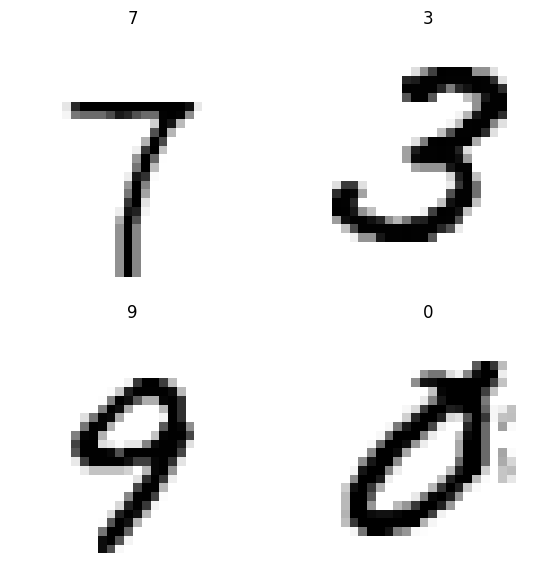

In [120]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(y_train[rand_index])
  plt.axis(False)

## Build CapsNet model

In [121]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [122]:
params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
}

model = CapsNet(**params)
model._name = 'CapsNet-MNIST'
model.compile()
model.summary()

Model: "CapsNet-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense_6 (Dense)             multiple                  0 (unused)
                                                                 
 dense_7 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [123]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam(), train_metrics=['accuracy', 'precision', 'recall', 'f1'], validation=(X_test, y_test))

Epoch 10/10: 100%|██████████| 16/16 [00:07<00:00,  2.27it/s, Training loss : 0.0003, Validation loss : 0.0010]


{'accuracy': ListWrapper([0.7626953125, 0.89453125, 0.935546875, 0.9619140625, 0.9765625, 0.9853515625, 0.9931640625, 0.994140625, 0.99609375, 0.9970703125]),
 'precision': ListWrapper([0.8048840341341155, 0.9048963678253423, 0.9379981478079629, 0.9625136745717675, 0.9768326349003764, 0.9857715328696326, 0.9932542061368398, 0.9942307686368398, 0.9961523916207107, 0.9971086090686274]),
 'recall': ListWrapper([0.7626953125, 0.89453125, 0.935546875, 0.9619140625, 0.9765625, 0.9853515625, 0.9931640625, 0.994140625, 0.99609375, 0.9970703125]),
 'f1': ListWrapper([0.7571582648314418, 0.894141772207723, 0.9353206490470162, 0.9619032132728917, 0.9765933828064627, 0.9853757649718383, 0.9931713250169163, 0.9941535215094581, 0.9961037197355653, 0.997075281100112]),
 'loss': ListWrapper([0.007956966757774353, 0.003153176512569189, 0.0019749675411731005, 0.0013226409209892154, 0.0009252444724552333, 0.0006853450904600322, 0.000529198267031461, 0.00041359596070833504, 0.0003276891366112977, 0.000267

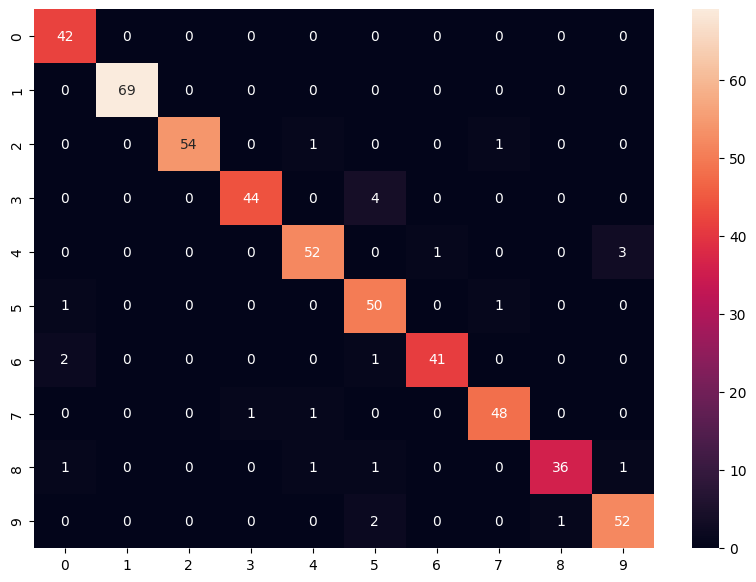

In [124]:
model.evaluate(X_test, y_test, np.arange(10))

## Loading and saving

INFO:tensorflow:Assets written to: ../saved_models/CapsNet-MNIST/assets


INFO:tensorflow:Assets written to: ../saved_models/CapsNet-MNIST/assets


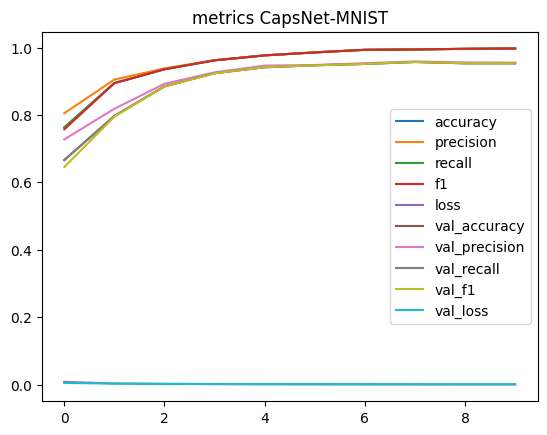

In [125]:
model.save()

In [126]:
loaded_model = tf.keras.models.load_model('../saved_models/CapsNet-MNIST', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()

Model: "CapsNet-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  10496     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2654464   
                                                                 
 dense_8 (Dense)             multiple                  82432     
                                                                 
 dense_9 (Dense)             multiple                  525312    
                                                                 
 dense (Dense)               multiple                  803600    
                                                                 
Total params: 5,550,864
Trainable params: 5,550,864
Non-trainable params: 0
_________________________________________________________________
